In [2]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


In [5]:
import matplotlib as mpl

mpl.rcParams['axes.autolimit_mode'] = 'round_numbers'
mpl.rcParams['axes.xmargin'] = 0
mpl.rcParams['axes.ymargin'] = 0

In [6]:
pwt = pd.read_stata('data/pwt100.dta')

### Part A: Plots

In [11]:
pwt.set_index(['country', 'year'], inplace=True)

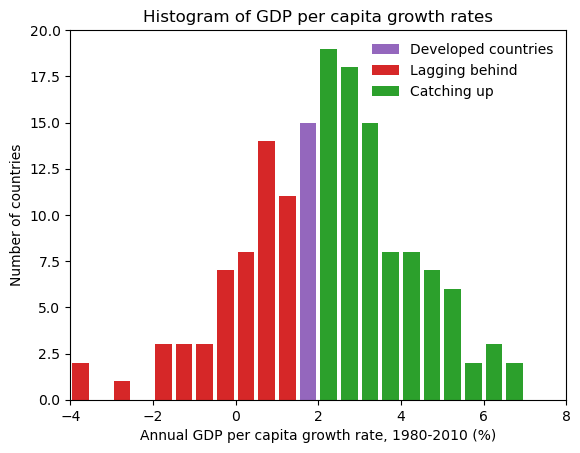

In [15]:
x_80 = pwt.xs(1980, level='year')['rgdpe']/pwt.xs(1980, level='year')['pop']

x_10 = pwt.xs(2010, level='year')['rgdpe']/pwt.xs(2010, level='year')['pop']
g = 100*((x_10/x_80)**(1/(2010-1980))-1)
plt.hist(g.dropna(), np.arange(1.5, 2.5, 0.5), histtype='bar', rwidth=0.8, fc='C4', label='Developed countries')
plt.hist(g.dropna(), np.arange(-10, 2, 0.5), histtype='bar', rwidth=0.8, fc='C3', label='Lagging behind')
plt.hist(g.dropna(), np.arange(2, 10, 0.5), histtype='bar', rwidth=0.8, fc='C2', label='Catching up')

plt.xlim(-4, 8)

plt.title('Histogram of GDP per capita growth rates')
plt.xlabel('Annual GDP per capita growth rate, 1980-2010 (%)')
plt.ylabel('Number of countries')

plt.legend(frameon=False)

plt.show()

This histogram emphasizes the economic divergence and convergence trends across countries during the stutdied priod. There appears to be a concentration of countries within the moderate groth rate range, indicating that many developed economies experiecnce steady and modest growth.
A subtantial nunber of countries are in the low or even negative growth rate range, which means this group likely includes economies that faced difficulties such as polotical instability or economic crisis. 
In summary, this distribution reflects varying degrees of economic development and the influence of global economic dynamics over three decades. 

### Part B: Solow Model

**Task 1**:

The steady-state level of capital per worker (k∗) is achieved when the amount of new capital added through savings equals the amount of lost capital (through depreciation and population growth). In this state, the economy grows constantly without changing capital per worker.
\begin{align}
s \cdot f(k^*) = (\delta + n) k^*
\end{align}

or
\begin{align}
k^* = \left(\frac{s \cdot A}{\delta + n}\right)^{\frac{1}{1 - \alpha}}
\end{align}


In [17]:
A = 1
α = 1/3
δ = 0.4
n = 0.05
s = 0.5
k_initial = 0.25
periods = 50

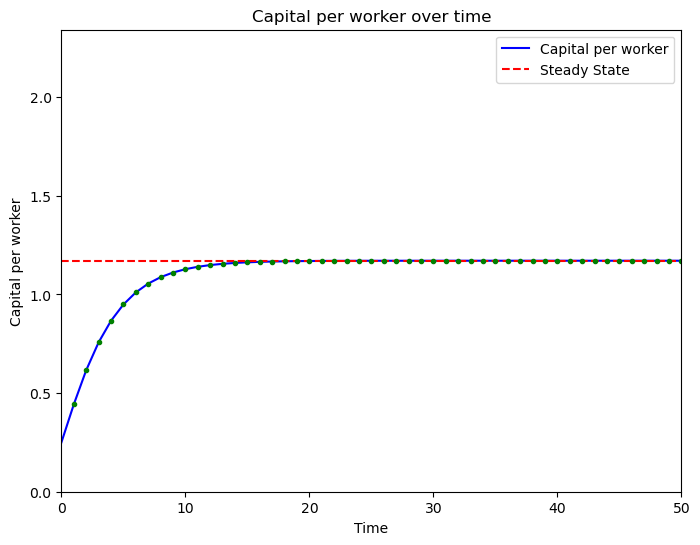

Steady state level of capital per worker = 1.1712


In [28]:
k_ss = ((s * A) / (δ + n)) ** (1 / (1 - α))
k_t = np.zeros(periods + 1)
k_t[0] = k_initial

def f(k):
    return k**α
    
def k_next(k):
    return ( s*A*f(k) + (1-δ)*k ) / (1+n)
    
# Simulation of capital accumulation over time
for t in range(1, periods + 1):
    k_t[t] = k_next(k_t[t - 1])

# Plotting the evolution of capital per worker
plt.figure(figsize=(8, 6))
plt.plot(k_t, label='Capital per worker', color='blue')
plt.axhline(y=k_ss, color='red', linestyle='dashed', label='Steady State')

# Mark the transition period
for t in range(1, periods + 1):
    plt.plot(t, k_t[t], 'o', color='green',markersize=3)

plt.title('Capital per worker over time')
plt.xlabel('Time')
plt.ylabel('Capital per worker')
plt.legend()
plt.ylim(0, 2 * k_ss)
plt.show()

print('Steady state level of capital per worker =', round(k_ss, 4))

The initial level of capital per worker is 0.25, when it rises to 1.1712, it reaches the steady state. The gradual approach to steady-state capial highlight the long-term nature of economic adjustments, suggests that policy changes affect savings, investment or productivity would take time to have the full impact on the economy, in this case, it takes about 13 years to reach the steady-state from the initial level. 

## Part B: Solow Model Homework


### Task 1
Assume the following parameters for the country ABC:

\\[
A = 1, \\quad \\alpha = \\frac{1}{3}, \\quad \\delta = 0.4, \\quad n = 0.05, \\quad s = 0.5
\\]

Calculate the steady-state value of the capital per worker (only up to 4 decimal points). Assume that the initial capital per worker is 0.25. 
Draw a plot with time (period) on the x-axis and capital per worker on the y-axis. Set the maximum period to 50. Show the initial level of capital per worker, 
transition period, and steady-state level of capital per worker clearly.

### Explanation of Parameters in the Solow Model

In Task 1, we are given several parameters for a hypothetical country, ABC. Below is an explanation of each parameter:

- **A (Technology level)**:  
  \( A = 1 \)  
  This represents the initial level of technology or productivity in the economy. A higher value of \( A \) would typically indicate an economy with advanced technology, which increases the output produced per worker.

- **α (Capital share of income)**:  
  \( \alpha = \frac{1}{3} \)  
  This parameter, also known as the capital elasticity of output, determines the proportion of output attributed to capital in the production function. A common assumption in the Solow model is \( \alpha = \frac{1}{3} \), suggesting that one-third of the output is due to capital, while the remaining two-thirds is due to labor.

- **δ (Depreciation rate)**:  
  \( \delta = 0.4 \)  
  This is the rate at which capital depreciates over time. A depreciation rate of 0.4 means that 40% of capital is "used up" or becomes obsolete each period. A high depreciation rate like this indicates that capital does not last very long, reducing the steady-state level of capital.

- **n (Population growth rate)**:  
  \( n = 0.05 \)  
  This rate represents the annual growth of the labor force. A growth rate of 0.05, or 5%, implies a rapidly growing labor force, which impacts the capital-to-labor ratio over time and, consequently, the steady-state level of capital.

- **s (Saving rate)**:  
  \( s = 0.5 \)  
  This is the fraction of output that is saved and invested in capital. A saving rate of 0.5 (or 50%) means that half of the output is reinvested in capital, which fuels economic growth. A higher saving rate typically leads to a higher steady-state level of capital.

These parameters are used in the Solow Model equation to calculate the steady-state level of capital per worker, which allows us to analyze the long-run equilibrium of an economy.

---

In [13]:
# Define the parameters for country ABC
A = 1            # Technology level
alpha = 1 / 3    # Capital share of income
delta = 0.4      # Depreciation rate
n = 0.05         # Population growth rate
s = 0.5          # Saving rate

# Initial conditions
k0 = 0.25        # Initial capital per worker
T = 50           # Maximum period to observe

In [15]:
# Define the Solow Model function to calculate capital per worker
def capital_per_worker(k, s=s, A=A, alpha=alpha, delta=delta, n=n):
    return s * A * k ** alpha - (delta + n) * k

In [17]:
# Calculate the steady-state capital per worker
k_star = (s * A / (delta + n)) ** (1 / (1 - alpha))
print(f"Steady-state capital per worker: {k_star:.4f}")

Steady-state capital per worker: 1.1712


In [19]:
# Simulate the capital per worker over time
k_t = [k0]
for t in range(1, T + 1):
    k_next = k_t[-1] + capital_per_worker(k_t[-1])
    k_t.append(k_next)

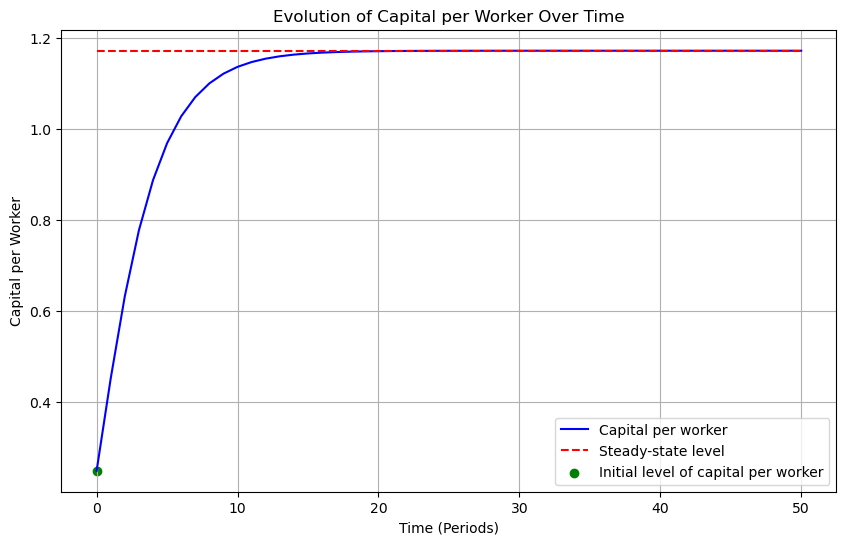

In [29]:
# Plot the evolution of capital per worker over time
plt.figure(figsize=(10, 6))
plt.plot(range(T + 1), k_t, label="Capital per worker", color="blue")
plt.hlines(y=k_star, xmin=0, xmax=T, colors="red", linestyles="--", label="Steady-state level")
plt.scatter(0, k0, color="green", label="Initial level of capital per worker")

plt.title("Evolution of Capital per Worker Over Time")
plt.xlabel("Time (Periods)")
plt.ylabel("Capital per Worker")
plt.legend()
plt.grid(True)
plt.show()

### Explanation of Code for Task 1 - Solow Model Simulation

1. **Parameter Definition**: We define the parameters for country ABC according to the task requirements:
   - \( A \): Technology level, set to 1.
   - \( \alpha \): Capital share of income, set to \( \frac{1}{3} \).
   - \( \delta \): Depreciation rate, set to 0.4.
   - \( n \): Population growth rate, set to 0.05.
   - \( s \): Saving rate, set to 0.5.
   - \( k_0 \): Initial level of capital per worker, set to 0.25.
   - \( T \): Maximum period to observe, set to 50.

2. **Steady-State Calculation**: We calculate the steady-state level of capital per worker, \( k^* \), using the Solow model formula:
   \[
   k^* = \left( \frac{s \cdot A}{\delta + n} \right)^{\frac{1}{1 - \alpha}}
   \]
   This represents the long-run equilibrium level of capital per worker when the economy reaches a stable state.

3. **Simulation Loop**: We simulate the evolution of capital per worker over time using a loop:
   - Starting from the initial level \( k_0 \), we calculate capital per worker for each subsequent period.
   - This is done using the function `capital_per_worker`, which incorporates the effects of saving, technology, capital depreciation, and population growth.

4. **Plotting**: We visualize the evolution of capital per worker over time:
   - The plot shows the initial level of capital, the transition over time, and the steady-state level as a dashed red line.
   - The x-axis represents time (in periods), and the y-axis represents capital per worker.
   - The plot also includes labels for easy interpretation and a grid for clarity.

This code helps illustrate how capital per worker evolves over time in the Solow model, showing the transition from the initial level to the steady-state equilibrium.


### Task 2

Assume now that country ABC is at steady-state, and we are in period 30. After 10 years at the steady-state, the saving rate increases from 0.5 to 0.6 permanently. 
Calculate the new steady-state level of capital per worker (up to 4 decimal points). On the same plot from Task 1, extend the period to 100, and show the new steady-state level of capital per worker. 
Discuss whether it increased or decreased and the economic intuition behind the change in the steady-state level after the saving rate change.

---

New steady-state capital per worker (after saving rate increase): 1.5396


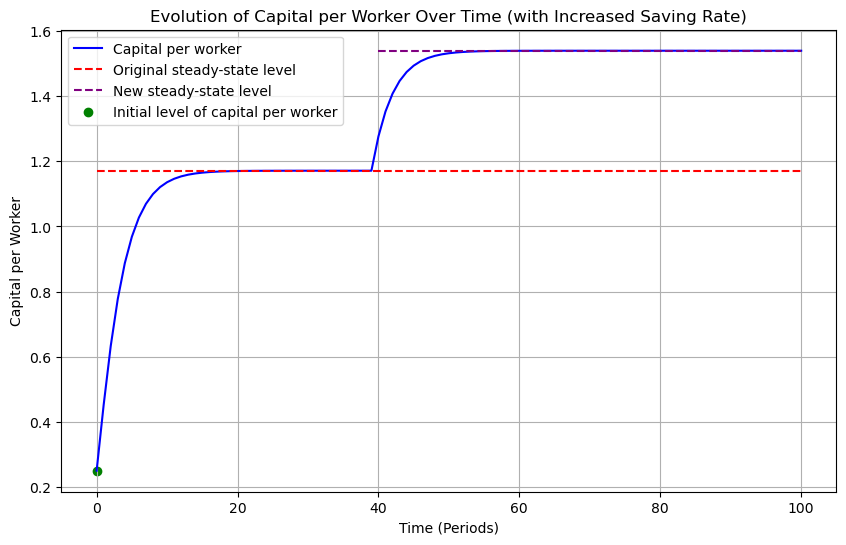

In [39]:
# Extend the simulation to 100 periods for Task 2
T_extended = 100

# Define new saving rate after period 30
s_new = 0.6

# Calculate the new steady-state capital per worker with the increased saving rate
k_star_new = (s_new * A / (delta + n)) ** (1 / (1 - alpha))
print(f"New steady-state capital per worker (after saving rate increase): {k_star_new:.4f}")

# Simulate the capital per worker over extended time with increased saving rate at period 40
k_t_extended = [k0]  # Start with initial level as in Task 1
for t in range(1, T_extended + 1):
    if t < 40:  # Before period 40, use the original saving rate (s = 0.5)
        k_next = k_t_extended[-1] + capital_per_worker(k_t_extended[-1], s=s)
    else:       # After period 40, apply the new saving rate (s = 0.6)
        k_next = k_t_extended[-1] + capital_per_worker(k_t_extended[-1], s=s_new)
    k_t_extended.append(k_next)

# Plot the evolution of capital per worker with both steady-state levels
plt.figure(figsize=(10, 6))
plt.plot(range(T_extended + 1), k_t_extended, label="Capital per worker", color="blue")
plt.hlines(y=k_star, xmin=0, xmax=T_extended, colors="red", linestyles="--", label="Original steady-state level")
plt.hlines(y=k_star_new, xmin=40, xmax=T_extended, colors="purple", linestyles="--", label="New steady-state level")
plt.scatter(0, k0, color="green", label="Initial level of capital per worker")

plt.title("Evolution of Capital per Worker Over Time (with Increased Saving Rate)")
plt.xlabel("Time (Periods)")
plt.ylabel("Capital per Worker")
plt.legend()
plt.grid(True)
plt.show()


### Task 3

Assume that country ABC starts at the initial steady-state you calculated in Task 1. After 10 years at the steady-state, a war reduces the capital per worker by 40%. 
However, all parameter values remain the same as in Task 1 (saving rate is 0.5). Calculate the new steady-state level of capital per worker. On the same plot from Task 1, extend the period to 100, 
and show the new steady-state level. Discuss whether it increased, decreased, or remained the same and the reasons behind this behavior. 
Show the initial level of capital per worker, transition period, and steady-state level of capital per worker clearly.

**Hint**: Refer to the section on saving rate analysis for helpful code snippets.
"""
)

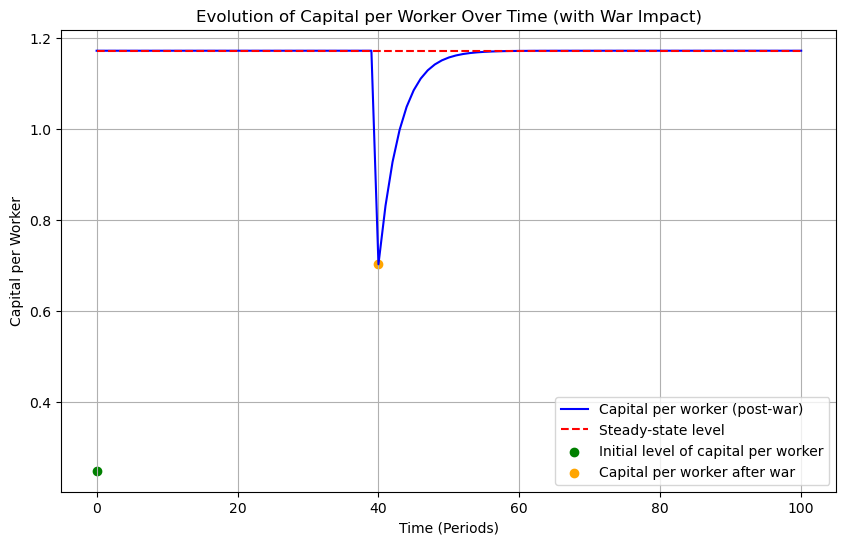

In [41]:
# Redefine initial conditions based on Task 1 steady-state as starting point
k_war_start = k_star  # Starting at the initial steady-state calculated in Task 1

# Define period when war occurs and capital per worker is reduced by 40%
war_period = 40
k_reduced = k_war_start * 0.6  # 40% reduction in capital per worker

# Simulate the capital per worker over extended time with reduction after the war
k_t_war = [k_war_start] * war_period  # Maintain steady-state up to war period
k_t_war.append(k_reduced)  # Apply capital reduction after war

# Continue simulation after war with original saving rate and parameters
for t in range(war_period + 1, T_extended + 1):
    k_next = k_t_war[-1] + capital_per_worker(k_t_war[-1])
    k_t_war.append(k_next)

# Plot the evolution of capital per worker with steady-state and war impact
plt.figure(figsize=(10, 6))
plt.plot(range(T_extended + 1), k_t_war, label="Capital per worker (post-war)", color="blue")
plt.hlines(y=k_star, xmin=0, xmax=T_extended, colors="red", linestyles="--", label="Steady-state level")
plt.scatter(0, k0, color="green", label="Initial level of capital per worker")
plt.scatter(war_period, k_reduced, color="orange", label="Capital per worker after war")

plt.title("Evolution of Capital per Worker Over Time (with War Impact)")
plt.xlabel("Time (Periods)")
plt.ylabel("Capital per Worker")
plt.legend()
plt.grid(True)
plt.show()


### Explanation of Code for Task 3 - Impact of War on Capital in Solow Model

1. **Initial Conditions**: 
   - We start at the steady-state level of capital per worker calculated in Task 1, \( k^* \).
   - The simulation extends up to 100 periods to observe recovery over time.

2. **Impact of War**: 
   - At period 40, a war reduces the capital per worker by 40%, resulting in a new level of capital:
     \[
     k_{\text{reduced}} = k^* \times 0.6
     \]
   - This level reflects the significant loss due to the war, but other parameters remain unchanged.

3. **Simulation Loop with Capital Reduction**:
   - For the first 40 periods, capital per worker remains steady at the initial steady-state level.
   - After period 40, the reduced capital is used as the starting point for further simulation.
   - The capital then gradually recovers due to the original saving rate, as the economy moves back towards the initial steady-state level.

4. **Plotting**:
   - The plot shows the initial steady-state level, the drop due to the war, and the recovery path.
   - Labels differentiate between the initial capital per worker, post-war reduction, and steady-state level.
   - The x-axis represents time (in periods), and the y-axis represents capital per worker.

This code demonstrates that despite the shock to capital per worker, the steady-state level remains the same, illustrating the resilience of the steady-state in the Solow model under unchanged parameters. The model predicts that the economy will eventually return to its original steady-state level after a temporary decline.
